# Divvy Ridership 2018
## By Alejandra Rosa, Brianna John & Jordan Evans

<img src="Images/logo.png" width="50%" height="50%">

In [1]:
# Dependencies
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from api_keys import weather_api_key
from api_keys import g_key
import calendar
import datetime

%matplotlib inline

In [2]:
# Files to Load
q1_2018_csv = "Resources/Divvy_Trips_2018_Q1.csv"
q2_2018_csv = "Resources/Divvy_Trips_2018_Q2.csv"
q3_2018_csv = "Resources/Divvy_Trips_2018_Q3.csv"
q4_2018_csv = "Resources/Divvy_Trips_2018_Q4.csv"

# Read divvy quarterly 2018 files and store into Pandas Data Frames
q1_data = pd.read_csv(q1_2018_csv)
q2_data = pd.read_csv(q2_2018_csv)
q3_data = pd.read_csv(q3_2018_csv)
q4_data = pd.read_csv(q4_2018_csv)

In [3]:
q1_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,1/1/2018 0:12,1/1/2018 0:17,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,1/1/2018 0:41,1/1/2018 0:47,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,1/1/2018 0:44,1/1/2018 1:33,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,1/1/2018 0:53,1/1/2018 1:05,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,1/1/2018 0:53,1/1/2018 0:56,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [4]:
q2_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0


In [5]:
#use dtypes to understand if start/end times are objects or dates
q1_data.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [6]:
#change both start/end times to 'datetime' format
q1_data['start_time'] = pd.to_datetime(q1_data['start_time'])
q1_data['end_time'] = pd.to_datetime(q1_data['end_time'])

In [9]:
q1_data.dtypes
q1_data.start_time.dt.strftime('%m-%y')
q1_data.end_time.dt.strftime('%m-%y')
#confirm that Q1 data is now in same format as rest of data
q1_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [10]:
#Concatenate all quarters into one dataframe
divvy_data = [q1_data, q2_data, q3_data, q4_data]

divvy_combined = pd.concat(divvy_data)

divvy_combined

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


# Question 1- When are the the most Divvy bikes on the road?

## Average rides over 2018:

   ## By understanding the most common times and routes that divvy operates, the city can decide where to add new bike lanes.
   
<img src="Images/Divvy_1.jpg" width="50%" height="50%">

In [11]:
# create a copy of our original dataframe to update
divvy_ride = divvy_combined
divvy_ride

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


In [15]:
#ensure all start/end times are matching in style
divvy_ride['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_ride['end_time'] = pd.to_datetime(divvy_combined['end_time'])

In [16]:
divvy_ride.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [17]:
#update dataframe to include hour
divvy_ride['hour'] = divvy_combined['start_time'].dt.hour
divvy_hour = divvy_ride.groupby('hour').count()
divvy_hour.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
hour,,,,,,,,,,,,
0,22490,22490,22490,22490,22490,22490,22490,22490,22490,22490,17433,17489
1,13391,13391,13391,13391,13391,13391,13391,13391,13391,13391,10170,10195
2,8229,8229,8229,8229,8229,8229,8229,8229,8229,8229,6203,6224
3,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318,4109,4118
4,6701,6701,6701,6701,6701,6701,6701,6701,6701,6701,5972,5990


In [63]:
divvy_to_pivot = pd.DataFrame(divvy_ride.groupby(["usertype","hour"])["trip_id"].count().reset_index())
divvy_to_pivot.head()

,usertype,hour,trip_id
0,Customer,0,5810
1,Customer,1,3639
2,Customer,2,2327
3,Customer,3,1371
4,Customer,4,841


In [47]:
divvy_to_pivot.rename(columns={'trip_id':'total_divvy_ride'}, inplace=True)

In [48]:
divvy_pivot = divvy_to_pivot.pivot(index="hour", columns="usertype", values="total_divvy_ride")
divvy_pivot.head()

usertype,Customer,Subscriber
hour,,
0,5810,16680
1,3639,9752
2,2327,5902
3,1371,3947
4,841,5860


In [49]:
#we will do a similar exercise to get day of week from dataframe
divvy_day=divvy_combined
divvy_day['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_day['end_time'] = pd.to_datetime(divvy_combined['end_time'])
divvy_day['day_of_week']=divvy_combined['start_time'].dt.weekday_name

In [50]:
divvy_weekday = divvy_day.groupby('day_of_week').count()
divvy_weekday.head(7)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour
day_of_week,,,,,,,,,,,,,
Friday,525681,525681,525681,525681,525681,525681,525681,525681,525681,525681,456816,457969,525681
Monday,528569,528569,528569,528569,528569,528569,528569,528569,528569,528569,461731,462721,528569
Saturday,445385,445385,445385,445385,445385,445385,445385,445385,445385,445385,311853,312805,445385
Sunday,405892,405892,405892,405892,405892,405892,405892,405892,405892,405892,285419,286220,405892
Thursday,562646,562646,562646,562646,562646,562646,562646,562646,562646,562646,503229,504384,562646
Tuesday,558584,558584,558584,558584,558584,558584,558584,558584,558584,558584,504646,505752,558584
Wednesday,576325,576325,576325,576325,576325,576325,576325,576325,576325,576325,516883,518022,576325


In [51]:
divvy_weekday_usertype = divvy_day.groupby(['day_of_week',"usertype"]).count()
divvy_weekday_usertype.head(7)

trip_id  start_time  end_time  bikeid  tripduration  \
day_of_week usertype                                                          
Friday      Customer      82703       82703     82703   82703         82703   
            Subscriber   442978      442978    442978  442978        442978   
Monday      Customer      80472       80472     80472   80472         80472   
            Subscriber   448097      448097    448097  448097        448097   
Saturday    Customer     161421      161421    161421  161421        161421   
            Subscriber   283964      283964    283964  283964        283964   
Sunday      Customer     145311      145311    145311  145311        145311   

                        from_station_id  from_station_name  to_station_id  \
day_of_week usertype                                                        
Friday      Customer              82703              82703          82703   
            Subscriber           442978             442978         442978   
Monday      Customer              80472              80472          80472   
            Subscriber           448097             448097         448097   
Saturday    Customer             161421             161421         161421   
            Subscriber           283964             283964         283964   
Sunday      Customer             145311             145311         145311   

                        to_station_name  gender  birthyear    hour  
day_of_week usertype                                                
Friday      Customer              82703   15264      15434   82703  
            Subscriber           442978  441552     442535  442978  
Monday      Customer              80472   14890      15096   80472  
            Subscriber           448097  446841     447625  448097  
Saturday    Customer             161421   28876      29249  161421  
            Subscriber           283964  282977     283556  283964  
Sunday      Customer             145311   25664      25963  145311

In [52]:
divvy_reorg = divvy_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
divvy_reorg

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour
day_of_week,,,,,,,,,,,,,
Monday,528569,528569,528569,528569,528569,528569,528569,528569,528569,528569,461731,462721,528569
Tuesday,558584,558584,558584,558584,558584,558584,558584,558584,558584,558584,504646,505752,558584
Wednesday,576325,576325,576325,576325,576325,576325,576325,576325,576325,576325,516883,518022,576325
Thursday,562646,562646,562646,562646,562646,562646,562646,562646,562646,562646,503229,504384,562646
Friday,525681,525681,525681,525681,525681,525681,525681,525681,525681,525681,456816,457969,525681
Saturday,445385,445385,445385,445385,445385,445385,445385,445385,445385,445385,311853,312805,445385
Sunday,405892,405892,405892,405892,405892,405892,405892,405892,405892,405892,285419,286220,405892


In [84]:
divvy_weekday_usertype

trip_id  start_time  end_time  bikeid  tripduration  \
day_of_week usertype                                                          
Friday      Customer      82703       82703     82703   82703         82703   
            Subscriber   442978      442978    442978  442978        442978   
Monday      Customer      80472       80472     80472   80472         80472   
            Subscriber   448097      448097    448097  448097        448097   
Saturday    Customer     161421      161421    161421  161421        161421   
            Subscriber   283964      283964    283964  283964        283964   
Sunday      Customer     145311      145311    145311  145311        145311   
            Subscriber   260581      260581    260581  260581        260581   
Thursday    Customer      71259       71259     71259   71259         71259   
            Subscriber   491387      491387    491387  491387        491387   
Tuesday     Customer      64501       64501     64501   64501         64501   
            Subscriber   494083      494083    494083  494083        494083   
Wednesday   Customer      71489       71489     71489   71489         71489   
            Subscriber   504836      504836    504836  504836        504836   

                        from_station_id  from_station_name  to_station_id  \
day_of_week usertype                                                        
Friday      Customer              82703              82703          82703   
            Subscriber           442978             442978         442978   
Monday      Customer              80472              80472          80472   
            Subscriber           448097             448097         448097   
Saturday    Customer             161421             161421         161421   
            Subscriber           283964             283964         283964   
Sunday      Customer             145311             145311         145311   
            Subscriber           260581             260581         260581   
Thursday    Customer              71259              71259          71259   
            Subscriber           491387             491387         491387   
Tuesday     Customer              64501              64501          64501   
            Subscriber           494083             494083         494083   
Wednesday   Customer              71489              71489          71489   
            Subscriber           504836             504836         504836   

                        to_station_name  gender  birthyear    hour  
day_of_week usertype                                                
Friday      Customer              82703   15264      15434   82703  
            Subscriber           442978  441552     442535  442978  
Monday      Customer              80472   14890      15096   80472  
            Subscriber           448097  446841     447625  448097  
Saturday    Customer             161421   28876      29249  161421  
            Subscriber           283964  282977     283556  283964  
Sunday      Customer             145311   25664      25963  145311  
            Subscriber           260581  259755     260257  260581  
Thursday    Customer              71259   13336      13516   71259  
            Subscriber           491387  489893     490868  491387  
Tuesday     Customer              64501   12004      12200   64501  
            Subscriber           494083  492642     493552  494083  
Wednesday   Customer              71489   13562      13704   71489  
            Subscriber           504836  503321     504318  504836

In [90]:
week_to_pivot = pd.DataFrame(divvy_weekday_usertype)
week_to_pivot.rename(columns={'trip_id':'total_divvy_ride'}, inplace=True)
week_to_pivot_final = week_to_pivot[['total_divvy_ride']]
week_to_pivot_final.head(5)

total_divvy_ride
day_of_week usertype                    
Friday      Customer               82703
            Subscriber            442978
Monday      Customer               80472
            Subscriber            448097
Saturday    Customer              161421

In [57]:
total_rides = [divvy_reorg["trip_id"].sum()]
total_rides

[3603082]

In [58]:
divvy_reorg['day_percent'] = divvy_reorg['trip_id']/total_rides*100
divvy_reorg

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour,day_percent
day_of_week,,,,,,,,,,,,,,
Monday,528569,528569,528569,528569,528569,528569,528569,528569,528569,528569,461731,462721,528569,14.669913
Tuesday,558584,558584,558584,558584,558584,558584,558584,558584,558584,558584,504646,505752,558584,15.502950
Wednesday,576325,576325,576325,576325,576325,576325,576325,576325,576325,576325,516883,518022,576325,15.995334
Thursday,562646,562646,562646,562646,562646,562646,562646,562646,562646,562646,503229,504384,562646,15.615687
Friday,525681,525681,525681,525681,525681,525681,525681,525681,525681,525681,456816,457969,525681,14.589760
Saturday,445385,445385,445385,445385,445385,445385,445385,445385,445385,445385,311853,312805,445385,12.361223
Sunday,405892,405892,405892,405892,405892,405892,405892,405892,405892,405892,285419,286220,405892,11.265134


In [59]:
plot_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [60]:
plot_hours= ['12AM', '1AM', '2AM', '3AM','4AM','5AM','6AM','7AM',
             '8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM',
             '5PM','6PM','7PM','8PM','9PM','10PM','11PM']

<function matplotlib.pyplot.show(*args, **kw)>

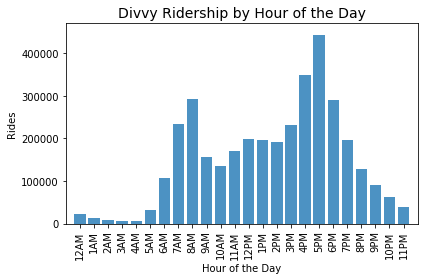

In [61]:
#Bar graph visualization by hour
    #Resources: https://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly

fig, ax1 = plt.subplots()

plt.bar(plot_hours, divvy_hour['trip_id'],alpha=.8)
plt.title("Divvy Ridership by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Rides")
plt.xticks(plot_hours, rotation='vertical')
plt.xlim(-1,24)
plt.ylim(0,470000)
plt.tight_layout()

fig.savefig('Output/hour_plot.png', dpi=fig.dpi)

plt.show

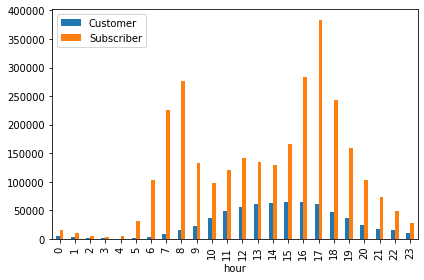

In [71]:
divvy_pivot.plot(kind='bar')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

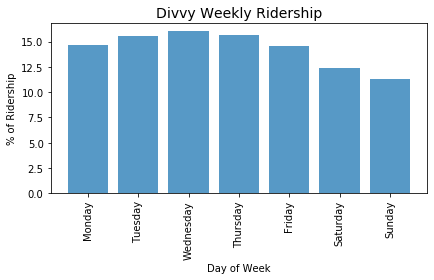

In [83]:
#Bar graph visualization by day of week
fig, ax1 = plt.subplots()

plt.bar(plot_days, divvy_reorg['day_percent'],alpha=0.75)
plt.xticks(plot_days, rotation='vertical')
plt.title("Divvy Weekly Ridership", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("% of Ridership")
plt.tight_layout()

fig.savefig('Output/day_plot.png')

plt.show

# Question 2 - What are the most used stops?

## Data from this section will help divvy optimize their bike replenishment routes and ensure that bikes are available where/when needed

<img src="Images/Divvy-bean.jpg" width="50%" height="50%">

In [92]:
stations_csv = "Resources/Divvy_Bicycle_Stations_-_All_-_Map.csv"
stations = pd.read_csv(stations_csv)

In [94]:
stations.rename(columns = {'Station Name':'from_station_name'}, inplace = True)
stations.head(5)

,ID,from_station_name,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,102,Stony Island Ave & 67th St,NaN,11,11,In Service,41.773459,-87.585340,"(41.77345849948, -87.5853397391)"
1,103,Clinton St & Polk St,NaN,15,15,In Service,41.871467,-87.640949,"(41.87146651779, -87.6409491327)"
2,11,Jeffery Blvd & 71st St,NaN,11,11,In Service,41.766638,-87.576450,"(41.76663823695, -87.5764501141)"
3,12,South Shore Dr & 71st St,NaN,15,15,In Service,41.766409,-87.565688,"(41.7664094567, -87.5656875719)"
4,132,Wentworth Ave & 24th St (Temp),NaN,15,15,In Service,41.850084,-87.632141,"(41.85008369347577, -87.6321405172348)"


In [95]:
divvy_df = pd.DataFrame(divvy_combined.groupby(["from_station_id"])["to_station_name"].count().reset_index())
divvy_df

,from_station_id,to_station_name
0,2,9062
1,3,23282
2,4,11544
3,5,8156
4,6,13515
...,...,...
616,660,200
617,661,25
618,662,46
619,663,68


In [96]:
divvy_df.rename(columns = {'from_station_id':'ID'}, inplace = True)
divvy_df

,ID,to_station_name
0,2,9062
1,3,23282
2,4,11544
3,5,8156
4,6,13515
...,...,...
616,660,200
617,661,25
618,662,46
619,663,68


In [97]:
divvy_locations = pd.merge(divvy_df, stations, on="ID", how="outer")
divvy_locations.head()

,ID,to_station_name,from_station_name,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,2,9062.0,Buckingham Fountain,NaN,39.0,39.0,In Service,41.876511,-87.620548,"(41.87651122881695, -87.62054800987242)"
1,3,23282.0,Shedd Aquarium,NaN,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
2,4,11544.0,Burnham Harbor,NaN,23.0,23.0,In Service,41.856268,-87.613348,"(41.856268, -87.613348)"
3,5,8156.0,State St & Harrison St,NaN,23.0,23.0,In Service,41.874053,-87.627716,"(41.874053, -87.627716)"
4,6,13515.0,Dusable Harbor,NaN,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)"


In [100]:
new_divvy = divvy_locations.drop(columns='Address')
new_divvy.head()

,ID,to_station_name,from_station_name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,2,9062.0,Buckingham Fountain,39.0,39.0,In Service,41.876511,-87.620548,"(41.87651122881695, -87.62054800987242)"
1,3,23282.0,Shedd Aquarium,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
2,4,11544.0,Burnham Harbor,23.0,23.0,In Service,41.856268,-87.613348,"(41.856268, -87.613348)"
3,5,8156.0,State St & Harrison St,23.0,23.0,In Service,41.874053,-87.627716,"(41.874053, -87.627716)"
4,6,13515.0,Dusable Harbor,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)"


In [101]:
new_divvy = new_divvy.dropna()

In [102]:
top_divvy_to = new_divvy.sort_values(by=['to_station_name'],ascending=False)
top_divvy_to.head(10)

,ID,to_station_name,from_station_name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
31,35,66944.0,Streeter Dr & Grand Ave,47.0,47.0,In Service,41.892278,-87.612043,"(41.892278, -87.612043)"
173,192,62654.0,Canal St & Adams St,47.0,47.0,In Service,41.879255,-87.639904,"(41.879255, -87.639904)"
69,77,51692.0,Clinton St & Madison St,31.0,31.0,In Service,41.882242,-87.641066,"(41.882242, -87.641066)"
79,91,48669.0,Clinton St & Washington Blvd,31.0,31.0,In Service,41.883380,-87.641170,"(41.88338, -87.64117)"
39,43,38029.0,Michigan Ave & Washington St,43.0,43.0,In Service,41.883984,-87.624684,"(41.8839840647265, -87.6246839761734)"
68,76,36174.0,Lake Shore Dr & Monroe St,39.0,39.0,In Service,41.880958,-87.616743,"(41.880958, -87.616743)"
176,195,35342.0,Columbus Dr & Randolph St,55.0,55.0,In Service,41.884728,-87.619521,"(41.884728, -87.619521)"
119,133,34589.0,Kingsbury St & Kinzie St,31.0,31.0,In Service,41.889177,-87.638506,"(41.88917683258, -87.6385057718)"
157,174,34188.0,Canal St & Madison St,35.0,35.0,In Service,41.882091,-87.639833,"(41.882091, -87.639833)"
71,81,33968.0,Daley Center Plaza,39.0,39.0,In Service,41.884241,-87.629634,"(41.884241, -87.629634)"


In [103]:
top_divvy_to_2 = top_divvy_to.head(10)

In [104]:
gmaps.configure(api_key=g_key)

In [105]:
locations = new_divvy[["Latitude", "Longitude"]].astype(float)

In [106]:
divvy_bikes = new_divvy['to_station_name'].astype(float)

In [157]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=divvy_bikes, 
                                 dissipating=False,max_intensity=40,
                                 point_radius = .0005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [110]:
top_locations = top_divvy_to_2[["Latitude", "Longitude"]].astype(float)
top_divvy_bikes = top_divvy_to_2['to_station_name'].astype(float)

fig = gmaps.figure()

heat_layer_top = gmaps.heatmap_layer(top_locations, weights=top_divvy_bikes, 
                                 dissipating=False, opacity=0.5,max_intensity=15,
                                 point_radius = .0003)

fig.add_layer(heat_layer_top)

fig

Figure(layout=FigureLayout(height='420px'))

## ROUTES

<img src="Images/Top_divvy_routes.JPG" width="50%" height="50%">

In [59]:
#attempt to map top "from divvy"

# Question 3 - How does weather affect rides? 
## Does ridership change month over month as weather changes?

<img src="Images/divvy_winter.jpg" width="30%" height="30%">


In [111]:
#make sure start/end time are dates, not objects
divvy_combined.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
day_of_week                  object
hour                          int64
dtype: object

In [112]:
#transform objects to dates
divvy_combined['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_combined['end_time'] = pd.to_datetime(divvy_combined['end_time'])

In [113]:
#check again
divvy_combined.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
day_of_week                  object
hour                          int64
dtype: object

In [115]:
#copy dataframe and add a month column using start time
divvy_combined_month = divvy_combined

divvy_combined_month['month'] = divvy_combined['start_time'].dt.month

divvy_combined_month.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,day_of_week,hour,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,Monday,0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,Monday,0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,Monday,0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,Monday,0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,Monday,0,1


In [116]:
#move month as index
month_count = divvy_combined_month.groupby('month').count()
month_count.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,day_of_week,hour
month,,,,,,,,,,,,,,
1,109706,109706,109706,109706,109706,109706,109706,109706,109706,109706,106201,106211,109706,109706
2,102950,102950,102950,102950,102950,102950,102950,102950,102950,102950,99550,99580,102950,102950
3,174489,174489,174489,174489,174489,174489,174489,174489,174489,174489,158901,159032,174489,174489
4,200112,200112,200112,200112,200112,200112,200112,200112,200112,200112,178186,178381,200112,200112
5,401150,401150,401150,401150,401150,401150,401150,401150,401150,401150,318267,318796,401150,401150


In [117]:
#need to bring temperature data - either avg temp by month or high/low temp by month  
    #https://www.timeanddate.com/weather/usa/chicago/historic?month=5&year=2018
temp_csv = "Resources/Chicago_temp_2018.csv"

In [119]:
temp = pd.read_csv(temp_csv)
temp

,month,high,low,average
0,1,60,-9,27
1,2,66,-1,31
2,3,58,22,37
3,4,80,21,42
4,5,96,45,66
5,6,94,52,71
6,7,95,62,77
7,8,96,60,77
8,9,95,42,70
9,10,88,28,54


In [120]:
update_temp = temp.set_index('month')
update_temp

,high,low,average
month,,,
1,60,-9,27
2,66,-1,31
3,58,22,37
4,80,21,42
5,96,45,66
6,94,52,71
7,95,62,77
8,96,60,77
9,95,42,70


In [121]:
months_to_plot = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

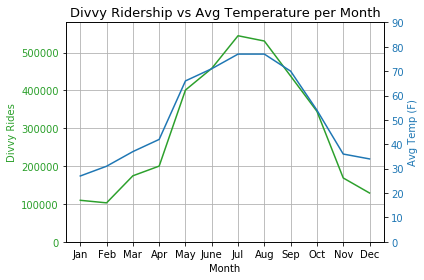

In [151]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.plot(months_to_plot, month_count['start_time'], label='Divvy Rides',color=color)
ax1.set_xlabel('Month')
ax1.set_title('Divvy Ridership vs Avg Temperature per Month', fontsize=13)
ax1.grid(True)
ax1.set_ylabel('Divvy Rides',color=color)
ax1.set_ylim(0, 580000)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.plot(temp['average'], label='Avg Temp(F)')
ax2.set_ylabel('Avg Temp (F)',color=color)
ax2.set_ylim(0, 90)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

fig.savefig('Output/temperature_plot.png', dpi=fig.dpi)

plt.show()

    <img src="Output/temperature_plot.png" width="50%" height="50%">


# Question 4 - Demographic Data

## This data will help inform Divvy's marketing efforts in new subscriber acquisition

<img src="Images/Divvy_demo.jpg" width="50%" height="50%">

In [123]:
gender_count = divvy_combined_month.groupby('gender').count()
gender_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear,day_of_week,hour,month
gender,,,,,,,,,,,,,,
Female,758736,758736,758736,758736,758736,758736,758736,758736,758736,758736,758708,758736,758736,758736
Male,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281809,2281841,2281841,2281841


In [124]:
gender_count.style.format({"trip_id": "{:,}"}) 

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear,day_of_week,hour,month
gender,,,,,,,,,,,,,,
Female,"758,736",758736,758736,758736,758736,758736,758736,758736,758736,758736,758708,758736,758736,758736
Male,"2,281,841",2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281809,2281841,2281841,2281841


In [125]:
gender_to_plot = gender_count[gender_count.columns[1:2]] 
gender_to_plot

,start_time
gender,
Female,758736
Male,2281841


In [127]:
divvy_combined_month.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,day_of_week,hour,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,Monday,0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,Monday,0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,Monday,0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,Monday,0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,Monday,0,1


In [128]:
subscriber_count = divvy_combined_month.groupby('usertype').count()
subscriber_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,gender,birthyear,day_of_week,hour,month
usertype,,,,,,,,,,,,,,
Customer,677156,677156,677156,677156,677156,677156,677156,677156,677156,123596,125162,677156,677156,677156
Subscriber,2925926,2925926,2925926,2925926,2925926,2925926,2925926,2925926,2925926,2916981,2922711,2925926,2925926,2925926


In [129]:
subscriber_count.style.format({"trip_id": "{:,}"})
subscriber_to_plot = subscriber_count[subscriber_count.columns[1:2]]
subscriber_to_plot

,start_time
usertype,
Customer,677156
Subscriber,2925926


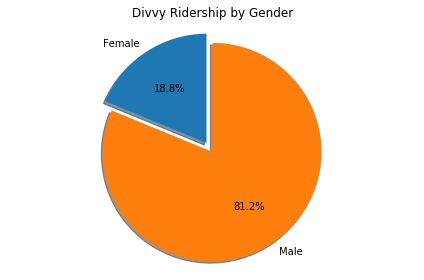

In [146]:
labels= ['Female', 'Male']

fig1, ax1 = plt.subplots()
explode = (0.1, 0)
ax1.pie(subscriber_to_plot['start_time'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Divvy Ridership by Gender')
ax1.axis('equal')  
plt.tight_layout()

plt.savefig('Output/gender.png', dpi=fig.dpi)

plt.show()

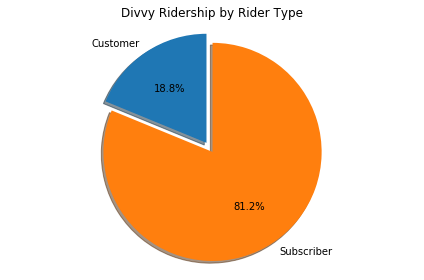

In [147]:
labels= ['Customer', 'Subscriber']
fig1, ax1 = plt.subplots()
explode = (0.1, 0)
ax1.pie(subscriber_to_plot['start_time'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Divvy Ridership by Rider Type')
ax1.axis('equal')  
plt.tight_layout()

plt.savefig('Output/user_type.png', dpi=fig.dpi)

plt.show()

In [136]:
divvy_df

,ID,to_station_name
0,2,9062
1,3,23282
2,4,11544
3,5,8156
4,6,13515
...,...,...
616,660,200
617,661,25
618,662,46
619,663,68


In [137]:
divvy_combined

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,day_of_week,hour,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,Monday,0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,Monday,0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,Monday,0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,Monday,0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,Monday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,Monday,23,12
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,Monday,23,12
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,Monday,23,12
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,Monday,23,12


In [138]:
#divvy_combined['tripduration'] = pd.to_numeric(divvy_combined['tripduration'], errors='coerce')

In [139]:
#from_station = divvy_combined.groupby('tripduration').mean()

In [140]:
age = divvy_combined.groupby('birthyear').count()
age

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,day_of_week,hour,month
birthyear,,,,,,,,,,,,,,
1895.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1899.0,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1900.0,277,277,277,277,277,277,277,277,277,277,274,277,277,277
1901.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1906.0,180,180,180,180,180,180,180,180,180,180,79,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000.0,6670,6670,6670,6670,6670,6670,6670,6670,6670,6670,6500,6670,6670,6670
2001.0,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377,1374,1377,1377,1377
2002.0,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038


In [141]:
bins = [1800, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2020]

# Create the names for the four bins
group_names = [1810, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2020]

#age.cut(['birthyear'], bins, labels = group_names)

In [142]:
age.cut(test_data,bins, labels = group_names)

AttributeError: 'DataFrame' object has no attribute 'cut'

In [ ]:
age["Age_bin"] = age.cut(age["birthyear"], bins, labels=group_names)
age

In [ ]:
from_station['age'] = 2020 - from_station['birthyear']
from_station

In [143]:
plt.bar(birth_to_plot['birthyear'], birth_to_plot['start_time'] ,alpha=0.75)
plt.title("Divvy Ridership by Hour of the day", fontsize=13)
plt.xlabel("Hour")
plt.ylabel("Rides")
plt.show

NameError: name 'birth_to_plot' is not defined